# Vector manipulation in Python

In this lab, you will have the opportunity to practice once again with the NumPy library. This time, we will explore some advanced operations with arrays and matrices.

At the end of the previous module, we used PCA to transform a set of many variables into a set of only two uncorrelated variables. This process was made through a transformation of the data called rotation. 

In this week's assignment, you will need to find a transformation matrix from English to French vector space embeddings. Such a transformation matrix is nothing else but a matrix that rotates and scales vector spaces.

In this notebook, we will explain in detail the rotation transformation. 

## Transforming vectors

There are three main vector transformations:
* Scaling
* Translation
* Rotation

In previous notebooks, we have applied the first two kinds of transformations. Now, let us learn how to use a fundamental transformation on vectors called _rotation_.

The rotation operation changes the direction of a vector, letting unaffected its dimensionality and its norm. Let us explain with some examples. 

In the following cells, we will define a NumPy matrix and a NumPy array. Soon we will explain how this is related to matrix rotation.

In [1]:
import numpy as np                     # Import numpy for array manipulation
import matplotlib.pyplot as plt        # Import matplotlib for charts


importing the plt_vectors utils function as a cell

In [10]:
import re
import string

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt 

# Procedure to plot and arrows that represents vectors with pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)



Example 1


In [3]:
#Create a 2x2 matrix
R = np.array([[2,0],
              [0,-2]])

In [12]:
x =np.array([[1,1]]) # Create a 1x2 matrix

The dot product between a vector and a square matrix produces a rotation and a scaling of the original vector. 

Remember that our recommended way to get the dot product in Python is np.dot(a, b):

In [16]:
y = np.dot(x, R) # Apply the dot product between x and R
y

array([[ 2, -2]])

In [8]:
#Upload transform_x.svg
from google.colab import files
files.upload()



Saving transform_x.svg to transform_x (1).svg


{'transform_x.svg': b'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="288pt" version="1.1" viewBox="0 0 432 288" width="432pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <defs>\n  <style type="text/css">\n*{stroke-linecap:butt;stroke-linejoin:round;}\n  </style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 288 \nL 432 288 \nL 432 0 \nL 0 0 \nz\n" style="fill:#ffffff;"/>\n  </g>\n  <g id="axes_1">\n   <g id="patch_2">\n    <path d="M 54 252 \nL 388.8 252 \nL 388.8 34.56 \nL 54 34.56 \nz\n" style="fill:#ffffff;"/>\n   </g>\n   <g id="patch_3">\n    <path clip-path="url(#p7e65e3ee20)" d="M 269.168484 112.256168 \nL 266.209242 118.021916 \nL 263.264796 116.10961 \nL 221.414796 143.28961 \nL 221.385204 143.27039 \nL 263.235204 116.09039 \nL 260.290758

In [14]:
#Upload transform_x_and_y.svg
from google.colab import files
files.upload()


Saving transformx_and_y.svg to transformx_and_y.svg


{'transformx_and_y.svg': b'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="288pt" version="1.1" viewBox="0 0 432 288" width="432pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <defs>\n  <style type="text/css">\n*{stroke-linecap:butt;stroke-linejoin:round;}\n  </style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 288 \nL 432 288 \nL 432 0 \nL 0 0 \nz\n" style="fill:#ffffff;"/>\n  </g>\n  <g id="axes_1">\n   <g id="patch_2">\n    <path d="M 54 252 \nL 388.8 252 \nL 388.8 34.56 \nL 54 34.56 \nz\n" style="fill:#ffffff;"/>\n   </g>\n   <g id="patch_3">\n    <path clip-path="url(#p8ff069ce7c)" d="M 269.168484 112.256168 \nL 266.209242 118.021916 \nL 263.264796 116.10961 \nL 221.414796 143.28961 \nL 221.385204 143.27039 \nL 263.235204 116.09039 \nL 260.2

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function `plot_vectors()` that takes care of all the intricate parts of the visual formatting. The code for this function is inside the `utils_nb.py` file. (Loaded as a cell above)

Now we can plot the vector $\vec x = [1, 1]$ in a cartesian plane. The cartesian plane will be centered at `[0,0]` and its x and y limits will be between `[-4, +4]`

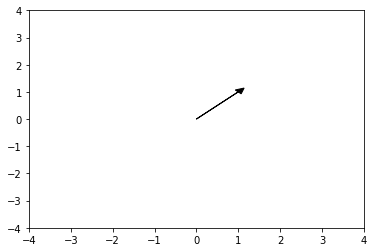

In [13]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

Now, let's plot in the same system our vector $\vec x = [1, 1]$ and its dot product with the matrix

$$Ro = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$$

$$y = x \cdot Ro = [[-2, 2]]$$

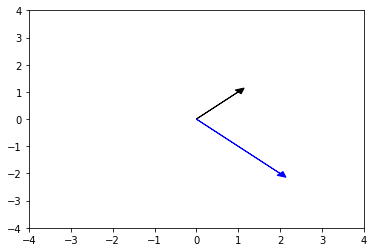

In [17]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

Note that the output vector `y` (blue) is transformed in another vector. 

### Example 2

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function that takes care of all the intricate parts of the visual formatting. The following procedure plots an arrow within a Pyplot canvas.

Data that is composed of 2 real attributes is telling to belong to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$

The trigonometric functions in Numpy require the angle in radians, not in degrees. In the next cell, we define a rotation matrix that rotates vectors by $45^o$.

In [18]:
angle = 100 * (np.pi / 180) #convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
y2 = np.dot(x2, Ro)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[ 1.62231915 -2.31691186]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


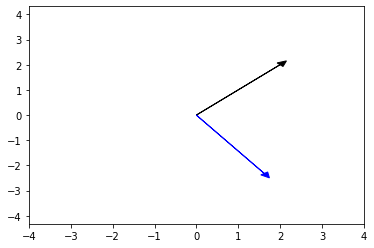

In [19]:
plot_vectors([x2, y2], fname='transform_02.svg')

Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotations matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

## Frobenius Norm

The Frobenius norm is the generalization to $R^2$ of the already known norm function for vectors 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$


In [20]:
A = np.array([[2, 2],
              [2, 2]])

`np.square()` is a way to square each element of a matrix. It must be equivalent to use the * operator in Numpy arrays.

In [21]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

Now you can sum over the elements of the resulting array, and then get the square root of the sum.

In [22]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

That was the extended version of the `np.linalg.norm()` function. You can check that it yields the same result.

In [23]:
print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095


**Congratulations!! We've covered a few more matrix operations in this lab. This will come in handy in this week's programming assignment!**